In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from field_map_analytic import Bz, Br
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../../..'))
sys.path.append(parent_dir)
from functions.set_plot_settings import setPlotSettings
setPlotSettings(font=True)

# Length of solenoid:
L = 300e-3 # m

# Solenoid inner radius:
a = 360e-3 # m

## Single solenoid -- no rotations

### Sanity check: B_z for r=0 and range of z values

/Users/criggall/Documents/muon-cooling/field-studies/map/field_map_analytic.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  br = mu*I/pi * xi/(4*r) * (2*(K(k) - E(k)) - k**2*K(k))


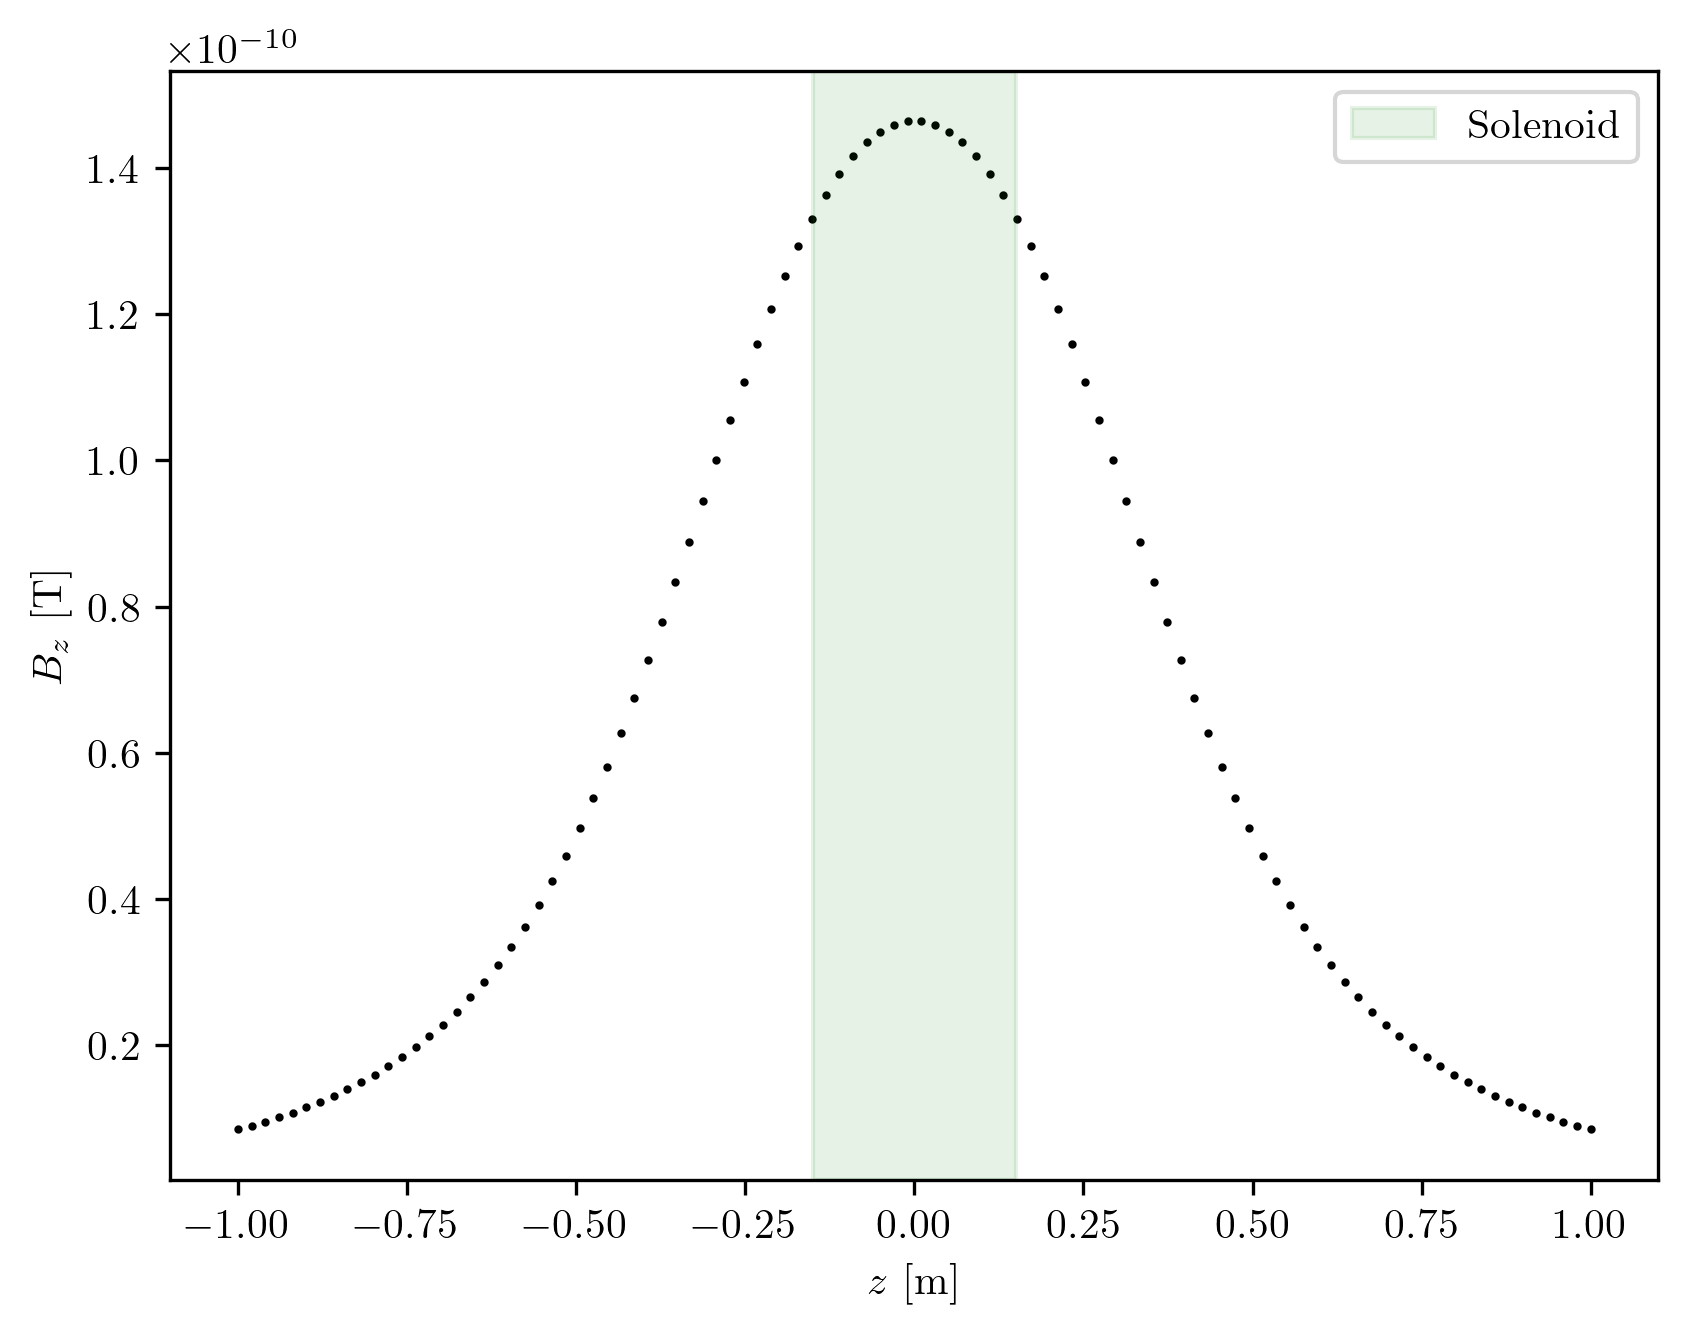

In [2]:
r = 0
z = np.linspace(-1, 1, 100)
Br_vals, Bz_vals = [], []
for z_val in z:
    Br_vals.append(Br(r, z_val))
    Bz_vals.append(Bz(r, z_val))

plt.scatter(z, Bz_vals, s=1, color='black')
plt.axvspan(xmin=-L/2, xmax=L/2, color='green', alpha=0.1, label='Solenoid')
plt.xlabel('$z$ [m]')
plt.ylabel('$B_z$ [T]')
plt.legend()
plt.show()

### Field map for transverse slice at z=0

In [3]:
start = -0.6
end = 0.6
samples = 100

In [4]:
x = np.linspace(start, end, samples)
y = np.linspace(start, end, samples)
xx, yy = np.meshgrid(x, y)
r = np.sqrt(xx**2 + yy**2)

In [5]:
z = 0
Br_vals = np.zeros((samples, samples))
Bz_vals = np.zeros((samples, samples))
for i in range(r.shape[0]):
    for j in range(r.shape[1]):
        Br_vals[i][j] = Br(r[i][j], z)
        Bz_vals[i][j] = Bz(r[i][j], z)

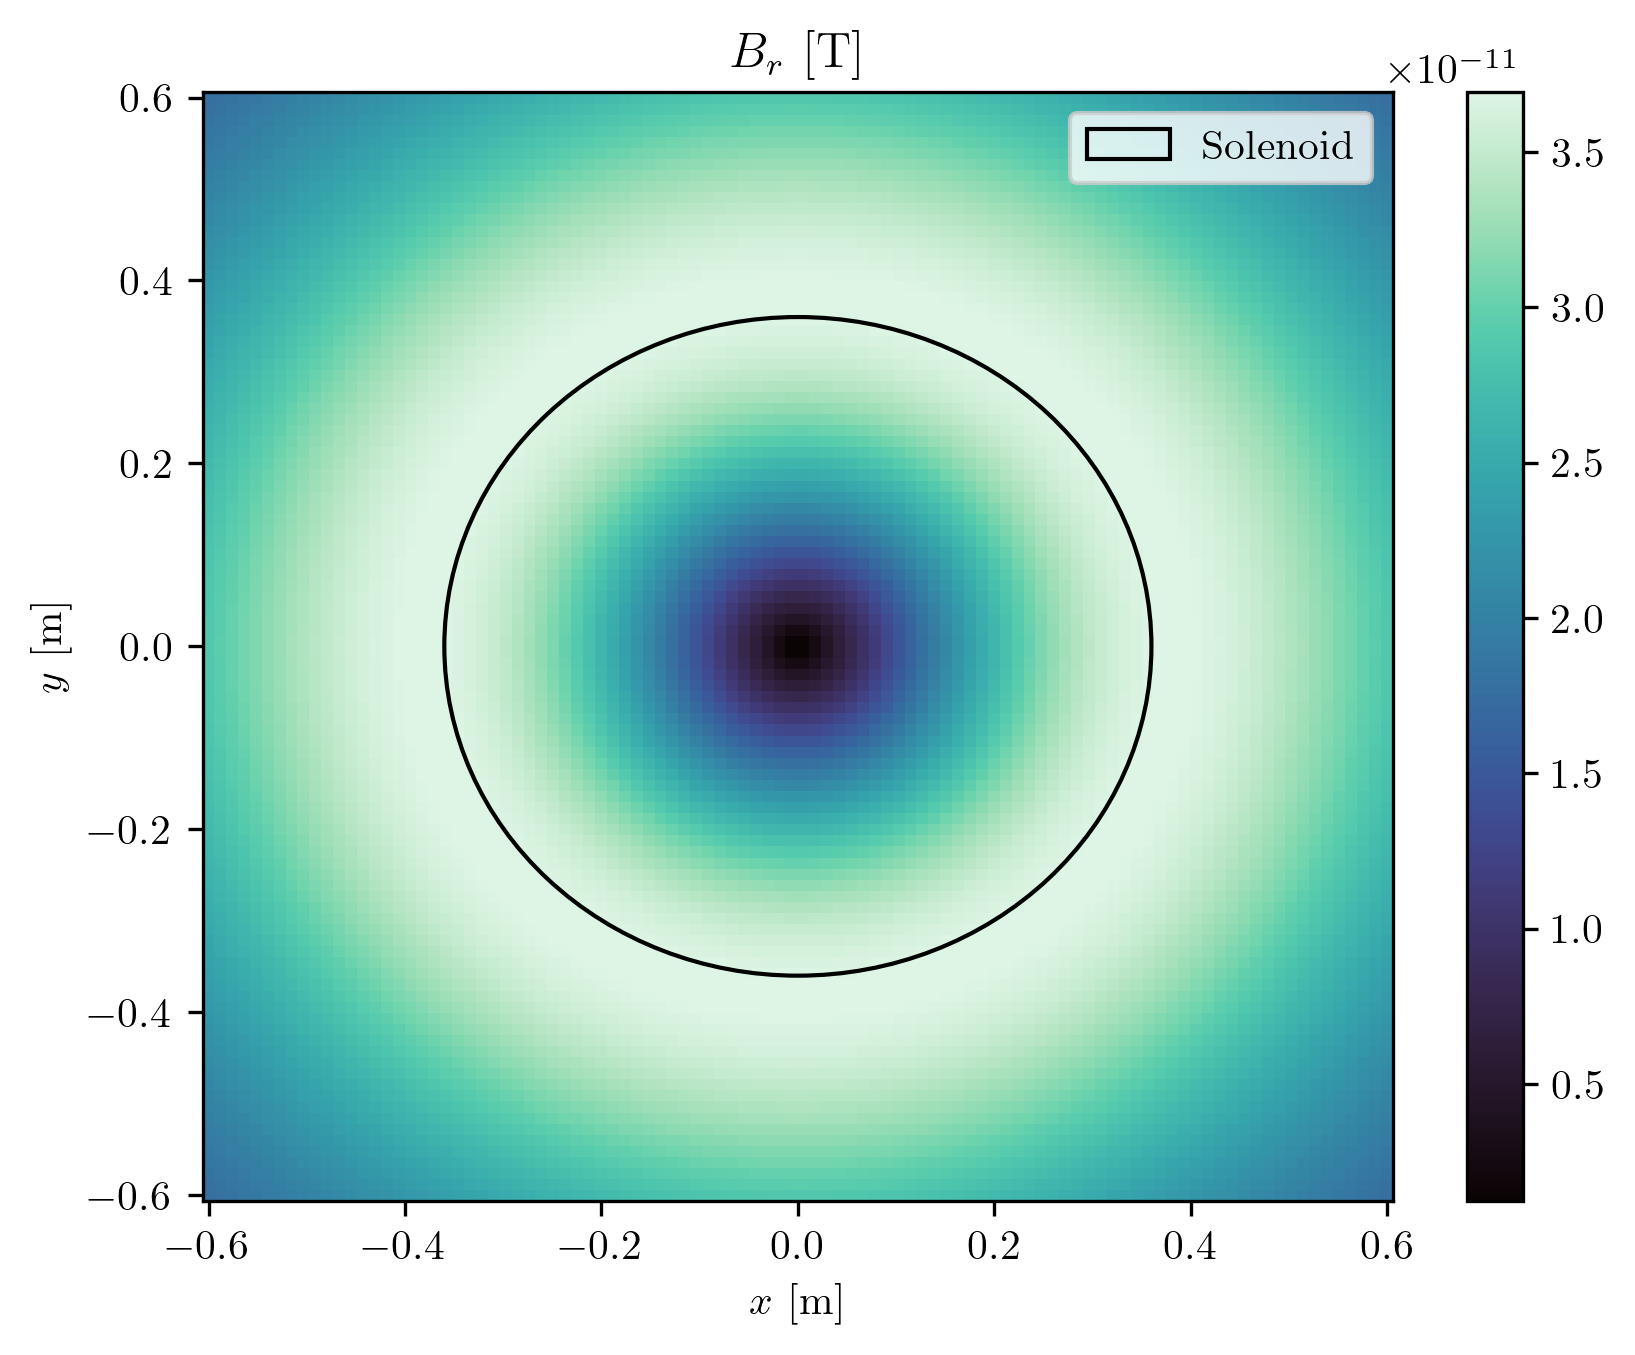

In [6]:
cmap = sns.color_palette("mako", as_cmap=True)
fig, ax = plt.subplots()
plt.pcolor(x, y, Br_vals, cmap=cmap)
plt.xlabel('$x$ [m]')
plt.ylabel('$y$ [m]')
plt.colorbar()
circle = plt.Circle([0,0], radius=a, fill=False, linestyle='-', color='black', label='Solenoid')
ax.add_patch(circle)
plt.legend(loc='upper right')
plt.title('$B_r$ [T]')
plt.show()

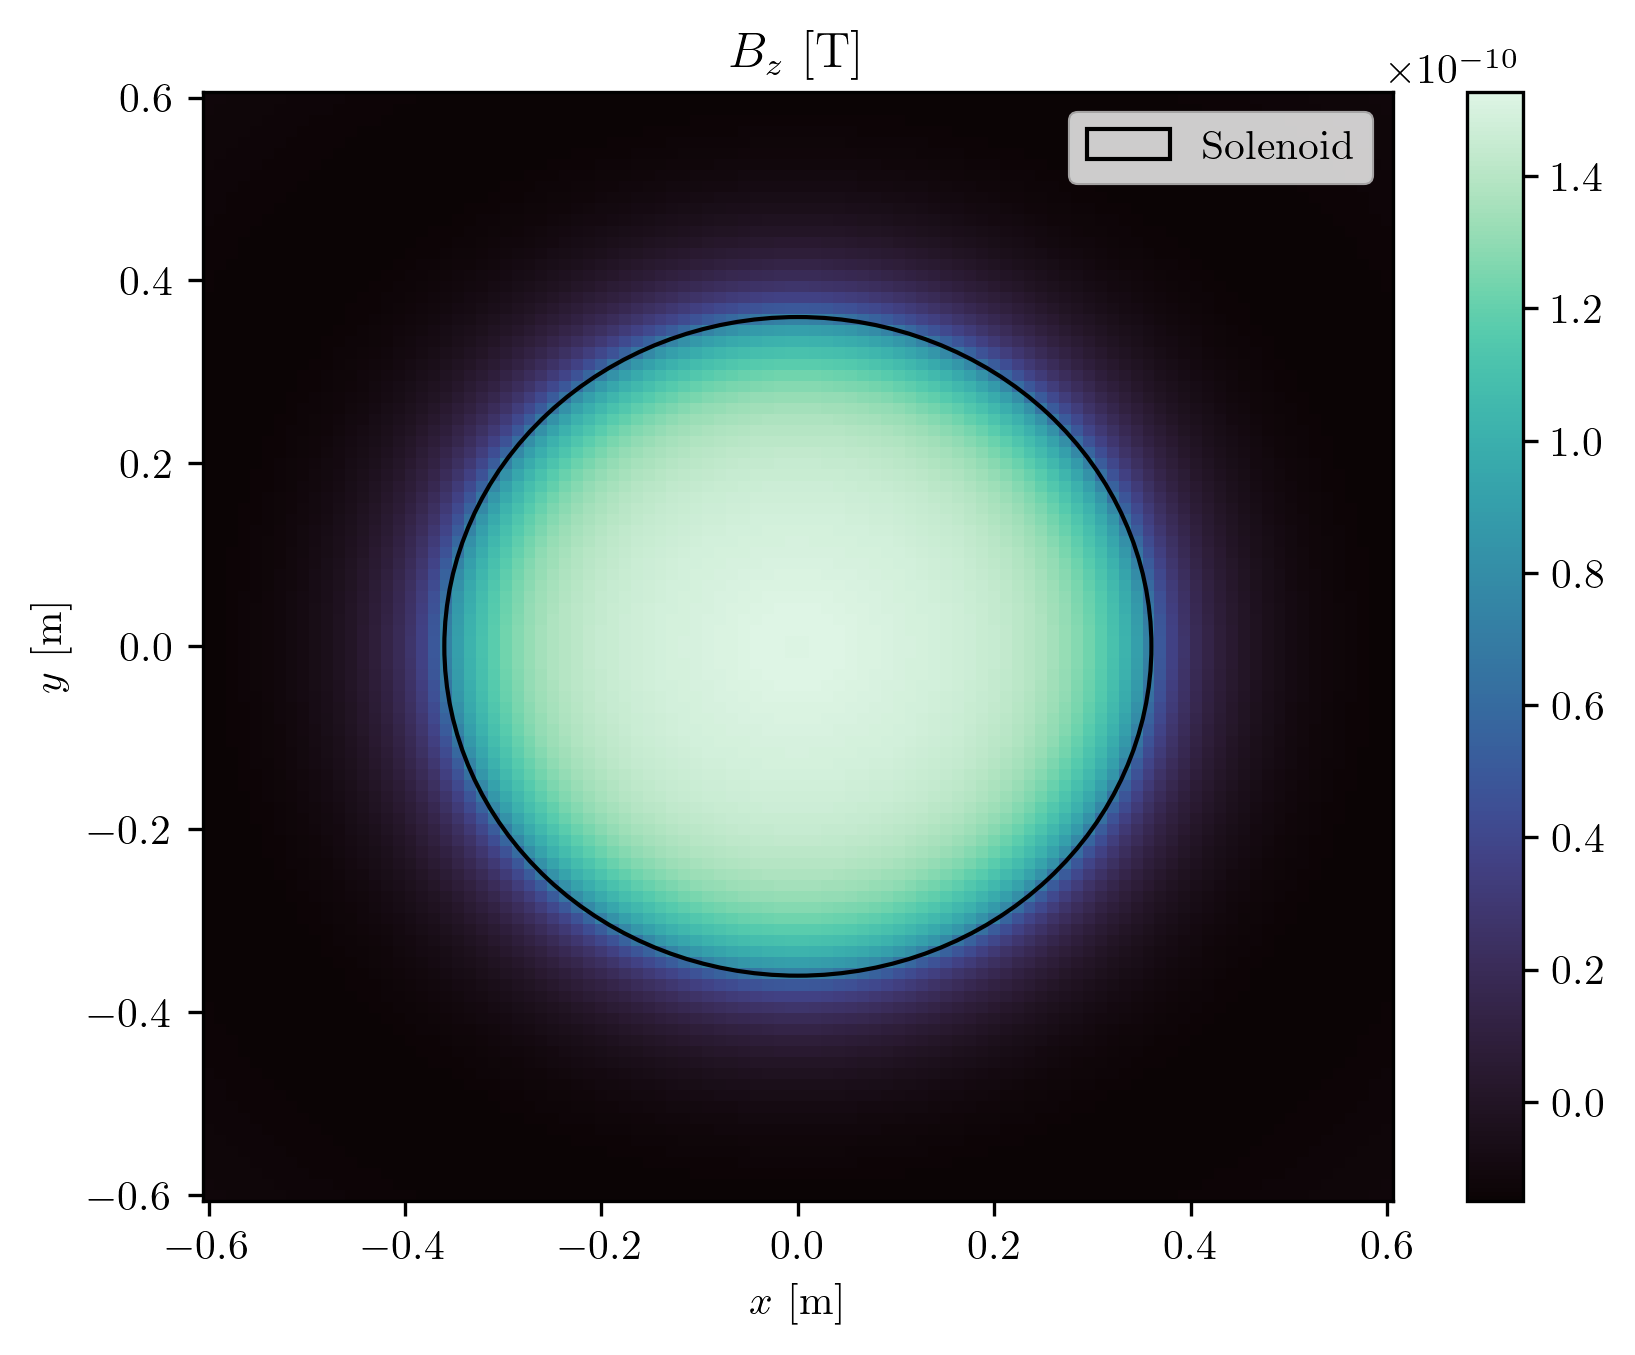

In [7]:
cmap = sns.color_palette("mako", as_cmap=True)
fig, ax = plt.subplots()
plt.pcolor(x, y, Bz_vals, cmap=cmap)
plt.xlabel('$x$ [m]')
plt.ylabel('$y$ [m]')
plt.colorbar()
circle = plt.Circle([0,0], radius=a, fill=False, linestyle='-', color='black', label='Solenoid')
ax.add_patch(circle)
plt.legend(loc='upper right')
plt.title('$B_z$ [T]')
plt.show()

### Animated field map for transverse slice along z

In [8]:
n = 20
z_vals = np.linspace(-0.4, 0.4, n)

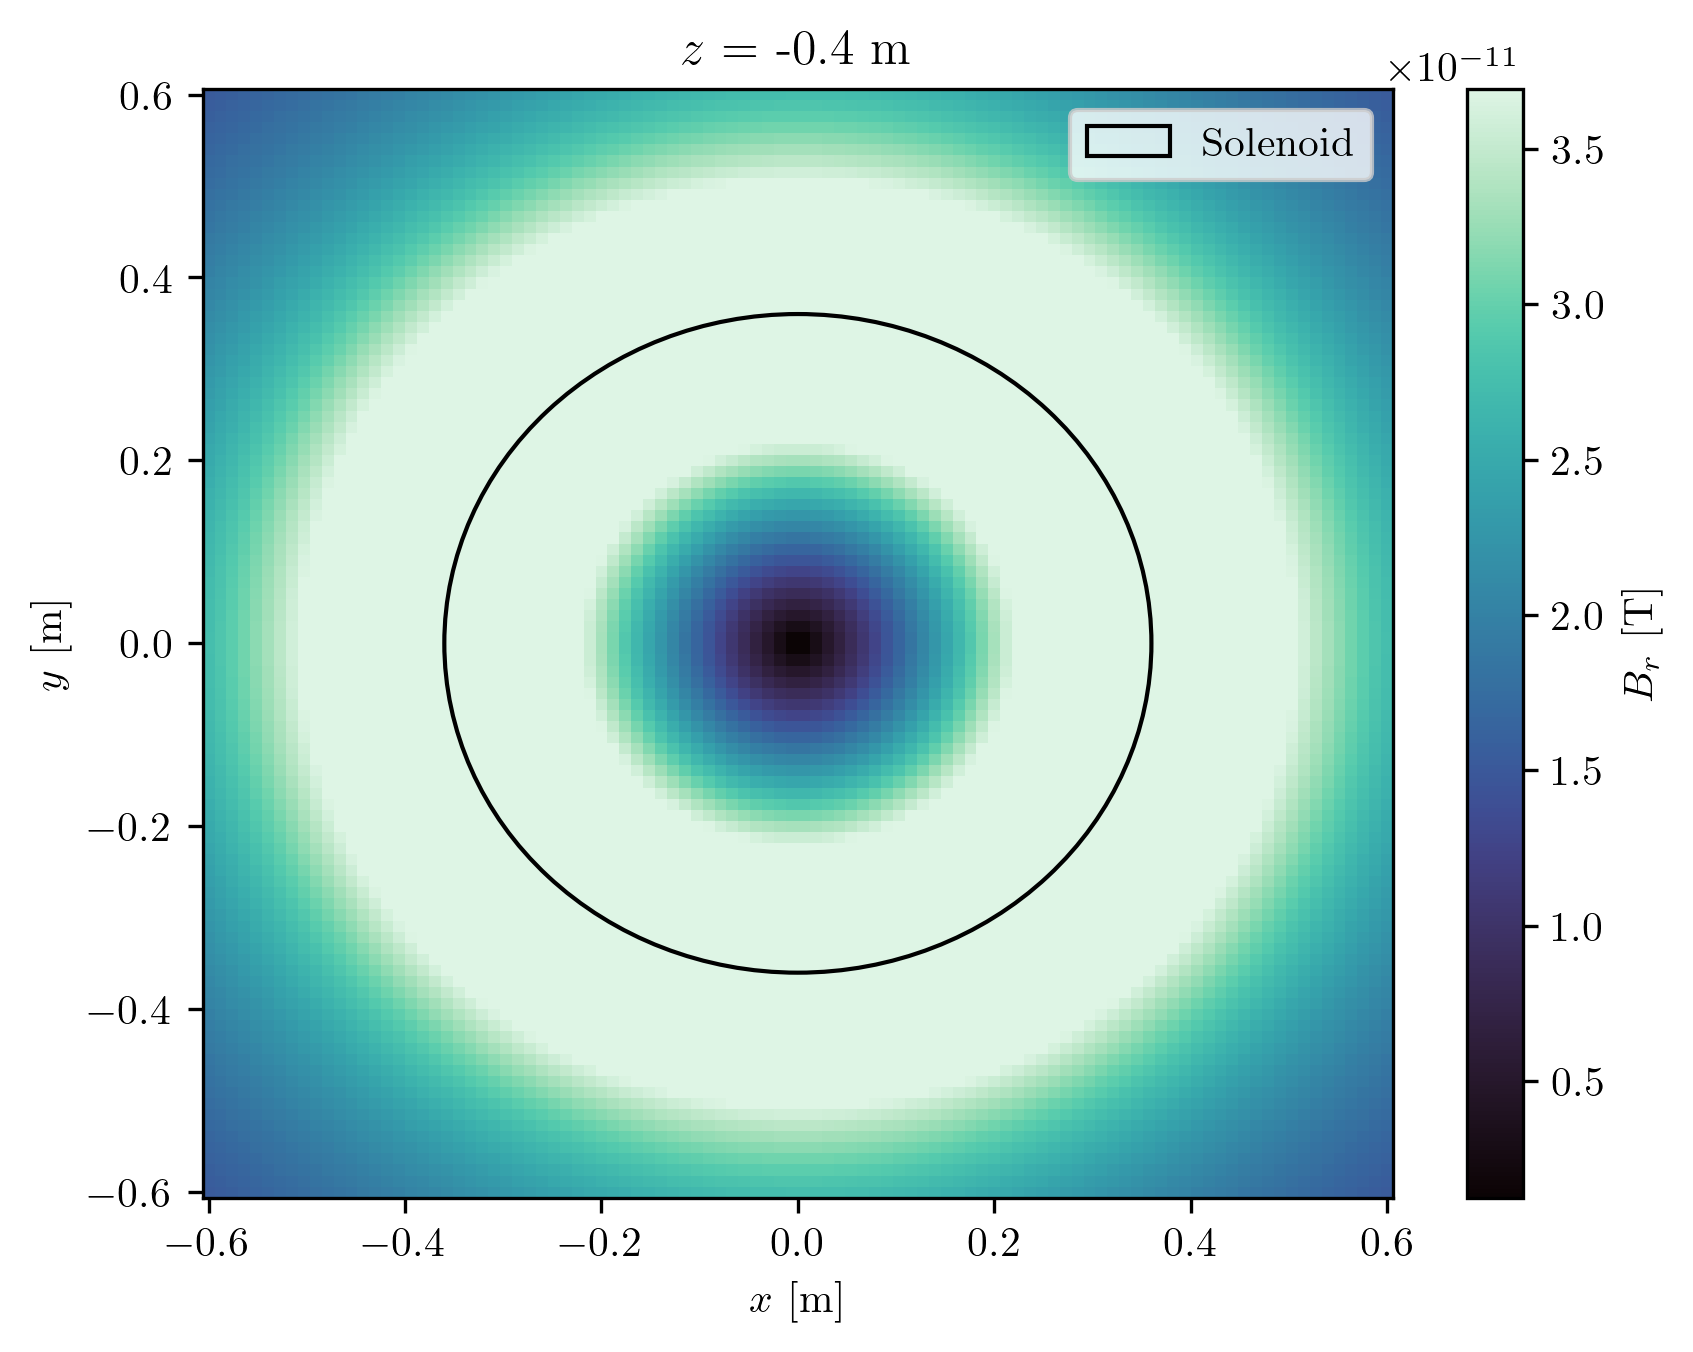

In [9]:
fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)

quad = ax.pcolormesh(x, y, Br_vals, cmap=cmap, shading='auto')
cbar = plt.colorbar(quad, ax=ax, label='$B_r$ [T]')
ax.set_xlabel('$x$ [m]')
ax.set_ylabel('$y$ [m]')
circle = plt.Circle((0, 0), radius=a, fill=False, linestyle='-', color='black', label='Solenoid')
ax.add_patch(circle)
ax.legend(loc='upper right')

def animate(frame):
    z = z_vals[frame]
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            Br_vals[i][j] = Br(r[i][j], z)
    quad.set_array(Br_vals.ravel())
    ax.set_title(f'$z$ = {np.round(z, 1)} m')
    return quad,

animation = FuncAnimation(fig, animate, frames=n, interval=300, blit=False, repeat=True)
animation.save('Br_analytic.gif', writer='pillow')

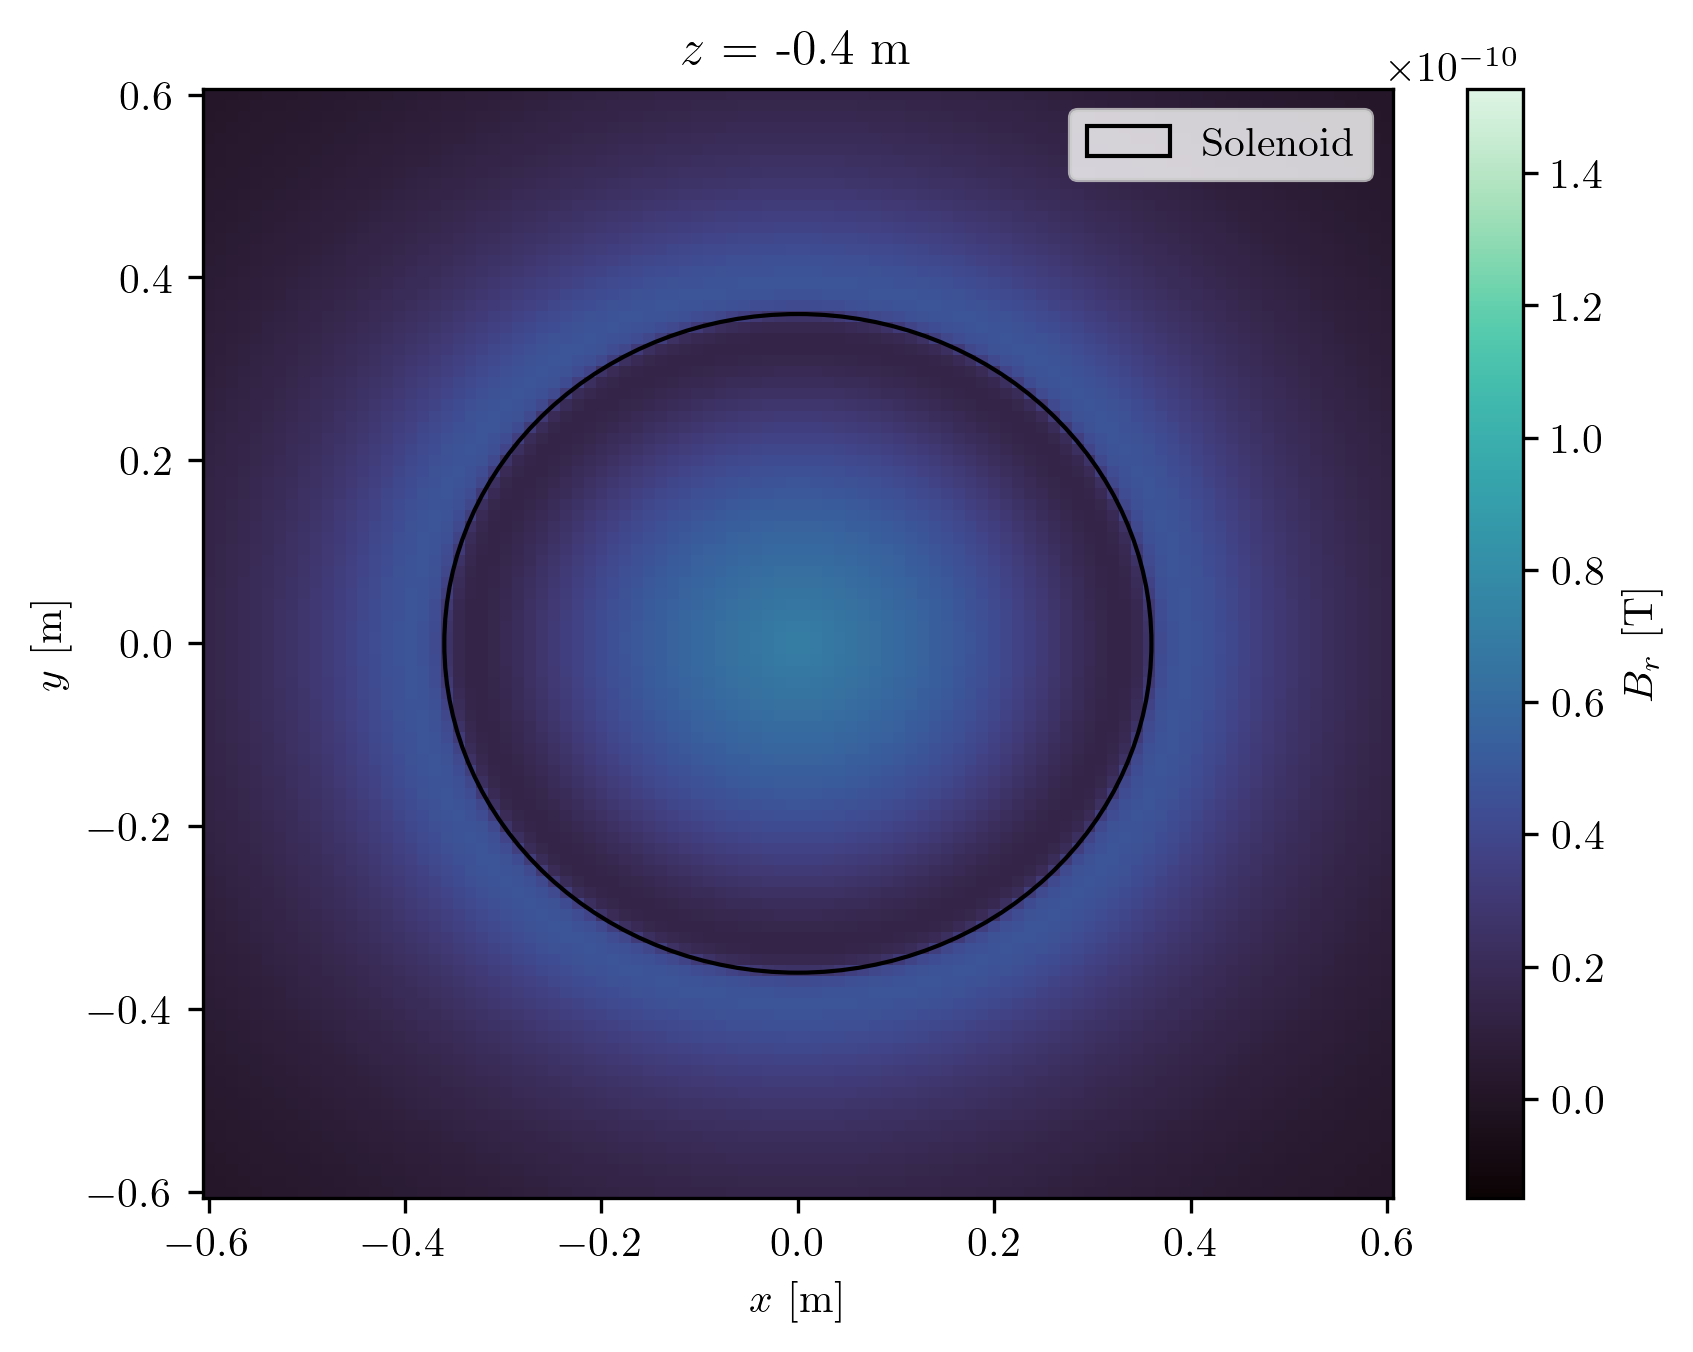

In [10]:
fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)

quad = ax.pcolormesh(x, y, Bz_vals, cmap=cmap, shading='auto')
cbar = plt.colorbar(quad, ax=ax, label='$B_r$ [T]')
ax.set_xlabel('$x$ [m]')
ax.set_ylabel('$y$ [m]')
circle = plt.Circle((0, 0), radius=a, fill=False, linestyle='-', color='black', label='Solenoid')
ax.add_patch(circle)
ax.legend(loc='upper right')

def animate(frame):
    z = z_vals[frame]
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            Bz_vals[i][j] = Bz(r[i][j], z)
    quad.set_array(Bz_vals.ravel())
    ax.set_title(f'$z$ = {np.round(z, 1)} m')
    return quad,

animation = FuncAnimation(fig, animate, frames=n, interval=300, blit=False, repeat=True)
animation.save('Bz_analytic.gif', writer='pillow')

## Single solenoid -- with pitch